## 任务开始

In [1]:
# 完成使用库的导入
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Path.cwd()

WindowsPath('D:/金砖比赛训练资料/练习题/(学院名称)_(姓名)')

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%config IPCompleter.greedy = True
%config IPCompleter.use_jedi = True
plt.rcParams['font.sans-serif'] = ['SimHei']
pd.options.display.max_colwidth = 100
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
!dir ..\(学院名称)_(姓名)\

 驱动器 D 中的卷是 Elements
 卷的序列号是 1A3B-705F

 D:\金砖比赛训练资料\练习题\(学院名称)_(姓名) 的目录

2020/09/01  19:22    <DIR>          .
2020/09/01  19:22    <DIR>          ..
2020/08/29  15:57    <DIR>          .ipynb_checkpoints
2018/08/16  10:37        21,540,942 Artificial_Intelligence_data.csv
2020/09/01  16:51             4,800 北京各区岗位需求量.html
2020/08/29  15:52             4,394 数据分析任务书.ipynb
2020/09/01  19:22            62,035 数据分析任务书2.ipynb
               4 个文件     21,612,171 字节
               3 个目录 242,191,171,584 可用字节


## 任务1：数据导入与查看(共计：10分)
### Step1：读取csv格式的Artificial_Intelligence_data(4分)

In [4]:
ai_data=pd.read_csv('../(学院名称)_(姓名)/Artificial_Intelligence_data.csv')

### Step2：ai_data查看前5行数据(3分)

In [5]:
ai_data.head(5)

,company,jobRequirement,salary,tags,title
0,北京捷通华声科技股份有限公司,"职位描述：, 1.负责智能机器人知识库的建设，保证机器人智能问答的准确率；, 2.收集客户的产品与服务知识库等资料，对资料进行整合与编辑；, 3.负责知识...",0.7-1万/月,北京 | 无工作经验 | 本科 | 招3人 | 08-14发布,人工智能训练工程师
1,NaN,NaN,NaN,NaN,NaN
2,寰宇优才教育科技（北京）有限公司,"【岗位方向】：,1、 Java+大数据软件开发工程师实习生,2、 人工智能+Python开发工程师实习生,【任职要求】：,1、大专及以上学历，计算机（网络)、电子信息、软件工程、（电气）自动化...",6-8千/月,北京-朝阳区 | 无工作经验 | 招16人 | 08-14发布,Java+人工智能实习工程师
3,广州市润东信息科技有限公司,"1. 研究机器学习、深度学习等领域的前沿技术并结合业务场景解决实际问题；,2. 通过对数据的敏锐洞察，深入挖掘产品潜在价值和需求，进而提供更有价值的产品和服务；,3. 通过技术创新推动产品成长...",1.5-2万/月,广州-番禺区 | 3-4年经验 | 本科 | 招1人 | 08-14发布,人工智能工程师
4,江苏厚学网信息技术股份有限公司,"岗位职责:,1. 开发软电话模块，完成与终端呼叫设备的对接；,2. 负责模块的需求分析，代码设计及实现。,任职要求：,1、专科以上学历；,2、熟悉C++开发;,3、熟悉Linux系统；,4、有...",10-20万/年,南京-秦淮区 | 3-4年经验 | 大专 | 招4人 | 08-14发布,C++高级开发工程师(人工智能方向)


### Step3：查看ai_data数据的行列数(3分)

In [6]:
ai_data.shape

(14383, 5)

## 任务2：缺失数据清洗(共计：10分)
### Step1：输出ai_data数据在缺失数据清洗处理前的数量(2分)

In [7]:
sum=ai_data.shape[0]
'删除全部缺失数据行前共计有：{}行'.format(sum)

'删除全部缺失数据行前共计有：14383行'

### Step2：处理ai_data的缺失数据并将原数据进行覆盖(6分)

In [8]:
ai_data=ai_data.fillna(0)

### Step3：输出ai_data数据在缺失数据清洗处理后的数量(2分)

In [9]:
sum=ai_data.shape[0]
'删除全部缺失数据行后共计有：{}行'.format(sum)

'删除全部缺失数据行后共计有：14383行'

## 任务3：数据处理与统计(共计：20分)
### Step1：将ai_data数据中工作地点进行处理，得到具体的城市数据(10分)

In [10]:
detailed_address = ai_data['tags'].str.split("|").str.get(0)
city = detailed_address.str.split('-').str.get(0)
# df.columns.str.strip().str.lower().str.replace(' ', '_')
city=city.str.strip()
city

0         北京
1        NaN
2         北京
3         广州
4         南京
        ... 
14378     深圳
14379     西安
14380    NaN
14381    NaN
14382     上海
Name: tags, Length: 14383, dtype: object

### Step2：统计招聘在前10的城市的岗位需求数量(10分)

In [11]:
num=city.value_counts().sort_values(ascending=False)[:10]
num

上海     3027
北京     1835
深圳     1647
广州     1259
杭州     1158
成都      553
武汉      545
南京      448
苏州      406
石家庄     290
Name: tags, dtype: int64

## 任务4：数据可视化-柱形图(共计：10分)
### Step1：制作招聘排名前10的城市的岗位需求数量，图像类型与下图基本一致(10分)

In [12]:
city1=pd.DataFrame({'city':city.values},index=city.index)
city1

,city
0,北京
1,NaN
2,北京
3,广州
4,南京
...,...
14378,深圳
14379,西安
14380,NaN
14381,NaN


Text(0.5, 1.0, '岗位需求排名前10的城市')

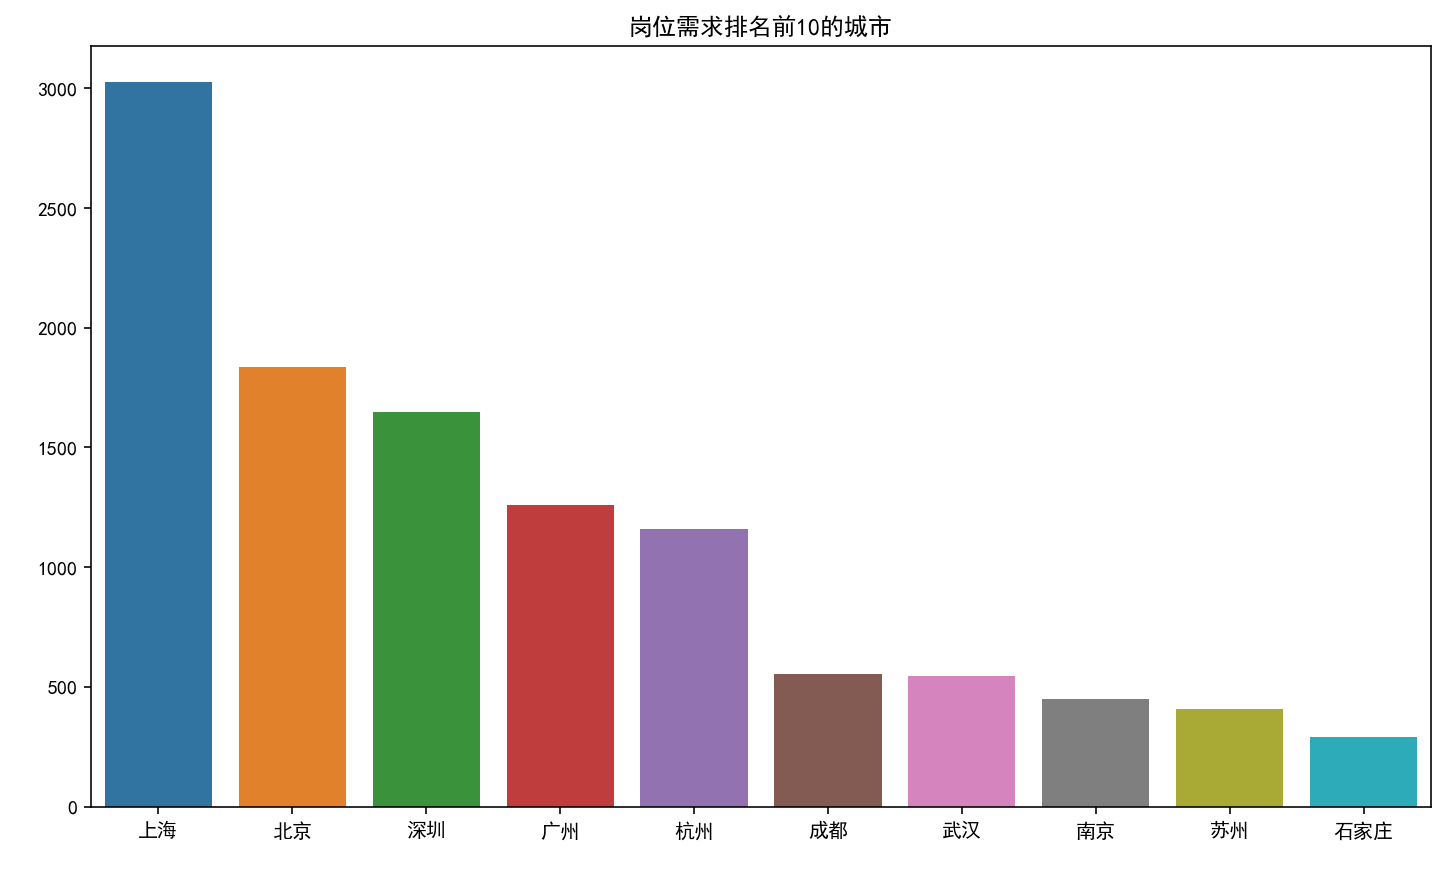

In [13]:
plt.figure(figsize=(12,7))
order=city1['city'].value_counts().sort_values(ascending=False)[:10].index
sns.countplot(data=city1,x=city1['city'],order=order)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('岗位需求排名前10的城市')

## 任务5：深度数据处理筛选与统计(30分)
### Step1：处理detailed_address数据中具体的区域，如果没有区域使用缺失数据NaN表示(12分)

In [14]:
detailed_address

0            北京  
1             NaN
2        北京-朝阳区  
3        广州-番禺区  
4        南京-秦淮区  
           ...   
14378    深圳-南山区  
14379        西安  
14380         NaN
14381         NaN
14382    上海-杨浦区  
Name: tags, Length: 14383, dtype: object

In [15]:
distrct=detailed_address.str.split('-').str.get(1)
distrct

0          NaN
1          NaN
2        朝阳区  
3        番禺区  
4        秦淮区  
         ...  
14378    南山区  
14379      NaN
14380      NaN
14381      NaN
14382    杨浦区  
Name: tags, Length: 14383, dtype: object

### Step2：统计城市为北京的所有区域的数量，注意：移除NaN的缺失数据(18分)

In [16]:
city2=pd.DataFrame({'city':city.values,'distrct':distrct},index=city.index)
city2

,city,distrct
0,北京,NaN
1,NaN,NaN
2,北京,朝阳区
3,广州,番禺区
4,南京,秦淮区
...,...,...
14378,深圳,南山区
14379,西安,NaN
14380,NaN,NaN
14381,NaN,NaN


In [17]:
city2=city2.dropna()
city2

,city,distrct
2,北京,朝阳区
3,广州,番禺区
4,南京,秦淮区
6,上海,浦东新区
9,上海,静安区
...,...,...
14374,上海,普陀区
14375,西安,莲湖区
14377,青岛,城阳区
14378,深圳,南山区


In [18]:
beijing_district=city2[city2.city=='北京']
bd_count=beijing_district['distrct'].value_counts()
bd_count

海淀区       610
朝阳区       333
房山区        91
昌平区        81
丰台区        48
西城区        40
大兴区        34
东城区        23
石景山区       16
通州区        10
顺义区         3
Name: distrct, dtype: int64

## 任务6：数据可视化-城市地图(共计：20分)
### Step1：制作统计北京各区岗位需求量的地图，图像类型与下图基本一致(20分)

In [44]:
cityname1=list(bd_count.index.str.strip())
cityname1

['海淀区', '朝阳区', '房山区', '昌平区', '丰台区', '西城区', '大兴区', '东城区', '石景山区', '通州区', '顺义区']

In [43]:
from pyecharts.charts import Map
from pyecharts import options as opts #初始化配置项
m = Map(init_opts=opts.InitOpts(width='900px', height='800px'))
m.add('',[list(z) for z in zip(cityname1, bd_count)],maptype='北京')
m.set_global_opts(title_opts=opts.TitleOpts(title='北京各岗位需求量',pos_left="center"),visualmap_opts=opts.VisualMapOpts(max_=610,min_=3))
m.render('北京各区岗位需求量.html')
m.render_notebook()

C:\Users\xiaomi\.conda\envs\aizoo\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
